# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats.stats import pearsonr
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice.
mice_count = mouse_metadata["Mouse ID"].value_counts().count()           
mice_count

249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_mouse_study_df.loc[combined_mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mice_ID['Mouse ID'].unique()

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# According to the pandas cheat sheet, df.isin() function allows us to check all rows in combined_mouse_study_df that have match 
# in dup_mice_df. Boolean allows us skip the data that we don't want to add to the cleaned_df.
cleaned_df = combined_mouse_study_df[combined_mouse_study_df['Mouse ID'].isin(dup_mice_df['Mouse ID'])==False]

# cleaned_df.loc[cleaned_df["Mouse ID"] == "g989", :]

cleaned_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_by_drugs = cleaned_df.groupby('Drug Regimen')
grouped_by_drugs.count()

#calculating the reqired values
mean = pd.Series(grouped_by_drugs['Tumor Volume (mm3)'].mean())
median = pd.Series(grouped_by_drugs['Tumor Volume (mm3)'].median())
variance = pd.Series(grouped_by_drugs['Tumor Volume (mm3)'].var())
std = pd.Series(grouped_by_drugs['Tumor Volume (mm3)'].std())
sem = pd.Series(grouped_by_drugs['Tumor Volume (mm3)'].sem())

#creating the summary dataframe
summary = {
            "Mean Tumor Volume" : mean,
            "Median Tumor Volume" : median,
            "Tumor Volume Variance" : variance,
            "Tumor Volume Std. Dev." : std,
            "Tumor Volume Std. Err." : sem   
           }

summary_df = pd.DataFrame(summary)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary2_df = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

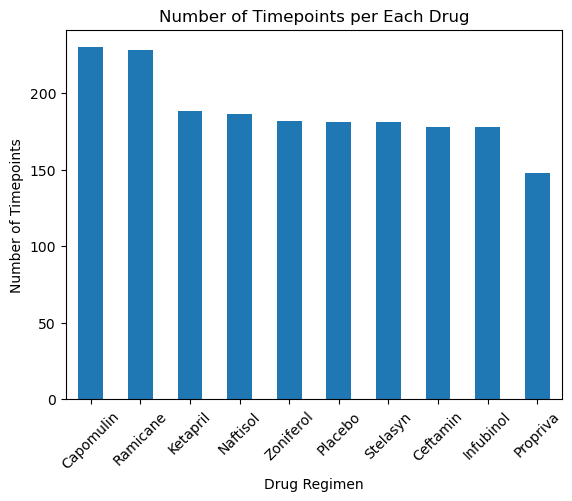

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_group = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count()
regimen_group = regimen_group.sort_values(ascending=False)

# plotting the bar chart and creating y-axis label

regimen_group = regimen_group.plot.bar(ylabel='Number of Timepoints', title='Number of Timepoints per Each Drug', rot = 45)

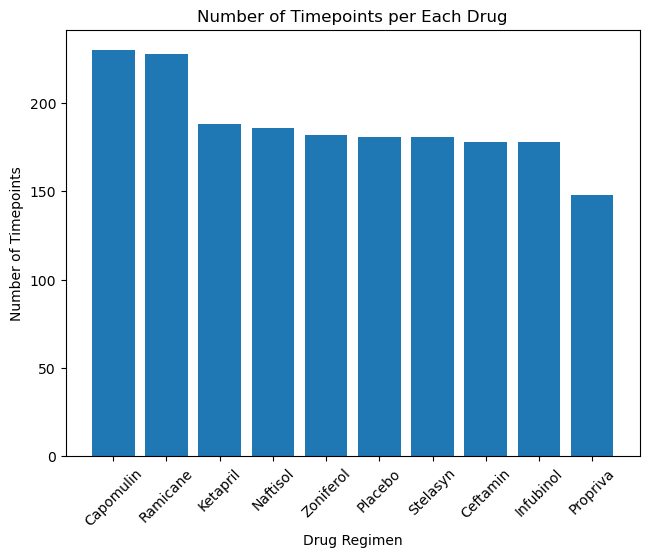

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = cleaned_df['Drug Regimen'].value_counts()
drug_regimen = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']
# drugs.head()

plt.bar(drug_regimen, drugs)
plt.tight_layout()
plt.xticks(rotation='45')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Number of Timepoints per Each Drug')

# Show plot
plt.show()



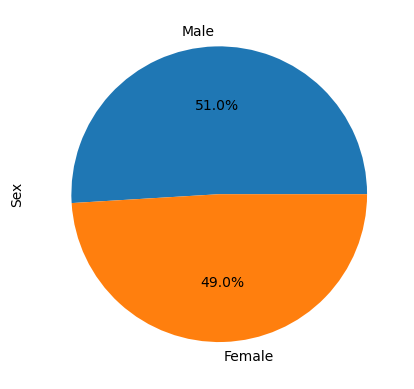

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = cleaned_df['Sex'].value_counts()
# mice_sex
# plotting the pie chart
mice_sex.plot.pie(y='Sex', autopct='%1.1f%%')
plt.show()

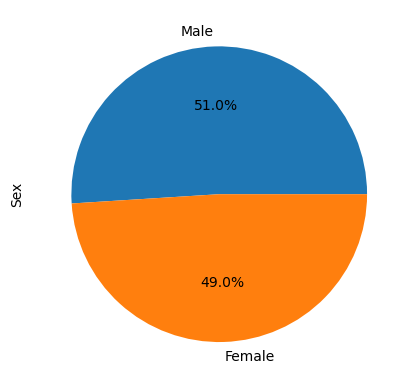

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# creating lists to plot
labels = ["Male", "Female"]
values = [51, 49]

# plotting 
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_tp = cleaned_df.groupby(by='Mouse ID')['Timepoint'].max()
last_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tum_vol = pd.merge(cleaned_df, last_tp, on=('Mouse ID', 'Timepoint'), how='right')
last_tum_vol.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
5,a401,Zoniferol,Female,8,25,45,66.794156,4
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
8,a457,Ketapril,Female,11,30,10,49.783419,0
9,a492,Stelasyn,Male,20,25,45,60.122011,1


In [226]:
# Create empty dict to fill with key-value pair: drug regimen: tumor vol data (for plotting)
tumor_vol_dict = {}


# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# create an empty list for each key
tumor_vol_dict[treatments[0]] = []
tumor_vol_dict[treatments[1]] = []
tumor_vol_dict[treatments[2]] = []
tumor_vol_dict[treatments[3]] = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. Use for loop to loop through 
# treatments in a treatment list and calculate needed metrics for each separate drug

# first for loop to create a dict of lists for treatments
for t in treatments:
    tumor_vol = last_tum_vol.loc[last_tum_vol['Drug Regimen'] == t, ['Tumor Volume (mm3)']]
    tumor_vol_dict[t].append(tumor_vol)                                                             
    
# print(tumor_vol_dict) 
outlier_list = []
# iterate through the dict to calculate required numbers 
for key, value in tumor_vol_dict.items():
    #print(key)
    lowerq = np.percentile(value, 25)
    upperq = np.percentile(value, 75)
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
              
    
    print(f"The lower quartile of {key} is: {lowerq}")
    print(f"The upper quartile of {key} is: {upperq}")
    print(f"The interquartile range of {key} is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f'Outliers are {outlier_list}')
    print("________________________________________________")    
    
    # Determine outliers using upper and lower bounds
  

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Outliers are [[     Tumor Volume (mm3)
19            38.982878
24            38.939633
61            30.485985
64            37.074024
66            40.159220
80            47.685963
83            37.311846
85            38.125164
87            38.753265
108           41.483008
115           38.846876
121           28.430964
124           33.329098
162           46.539206
163           32.377357
169           41.581521
174           23.343598
180           40.728578
183           34.455298
192           31.023923
204           40.658124
208           39.952347
220           36.041047
226           28.484033
239           31.896238]]
________________________________________________
The lower quartile of Ceftamin is: 48.72207785
The upper

In [168]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.




## Line and Scatter Plots

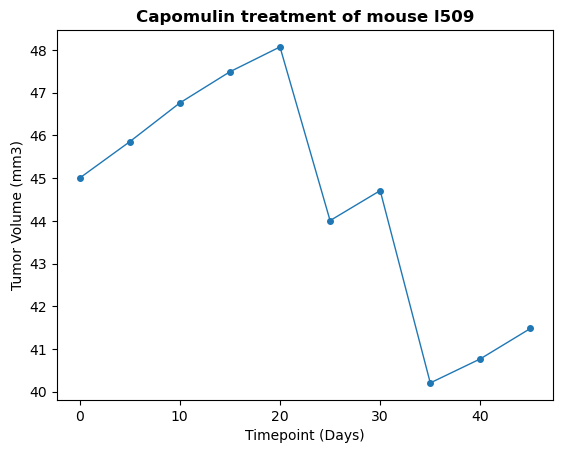

In [167]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509",:]
# mouse_df.head()

x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, y_axis, linewidth=1, markersize=4, marker="o")

# creating title, labels' names
plt.title('Capomulin treatment of mouse l509', fontweight='bold')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

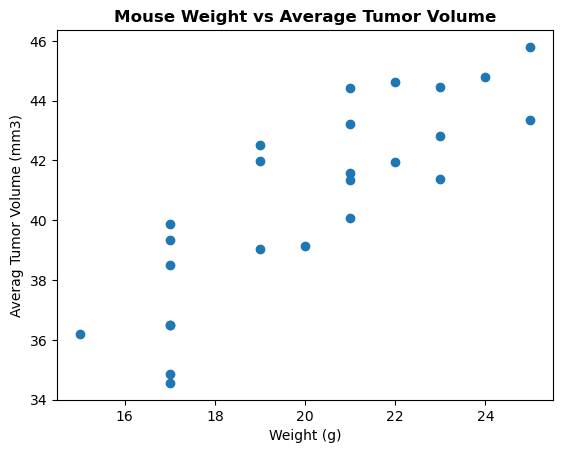

In [186]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# create df only for mice treated with Capomulin
cap_data = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin',:]
cap_data.head()

# calculate averages for each mouse
avg_cap = cap_data.groupby(['Mouse ID']).mean()
avg_cap.head()

# plot
plt.scatter(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])

# create a title and labels
plt.title('Mouse Weight vs Average Tumor Volume', fontweight='bold')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show


## Correlation and Regression

In [204]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# used pearson's formula to determine correlation coefficient.
# -1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables

corr = pearsonr(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])
corr2 = (round(corr[0], 2), round(corr[1], 2))
print(f"The correlation between mouse weight and average tumor volume is {corr2[0]}")

The correlation between mouse weight and average tumor volume is 0.84


In [208]:
# calculate linear regression
# lin_regres = st.linregress(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])
# lin_regres

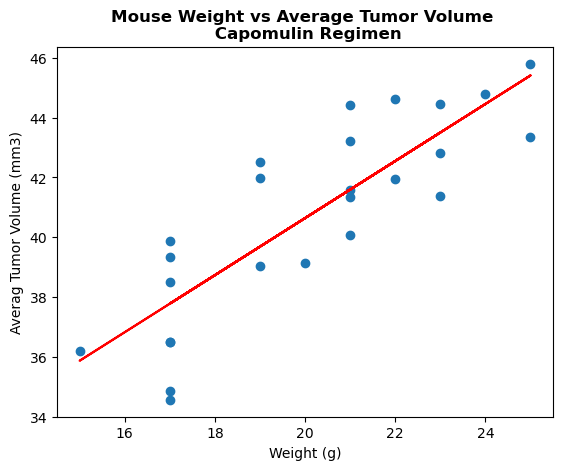

In [221]:
x_values = avg_cap['Weight (g)']
y_values = avg_cap['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# plot a scatter chart with 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='red')

# create a title and x,y-axis labels
plt.title('Mouse Weight vs Average Tumor Volume \n Capomulin Regimen', fontweight='bold')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()